# ***✅ Part 1: Preparation***

> Add blockquote



**import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import KBinsDiscretizer

# Classification data

**Feature Selection + displaying the head of the data**

In [2]:
# Load training and test data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
features = [
    'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
    'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC',
    'ROLE_FAMILY', 'ROLE_CODE'
]
target = 'ACTION'

# Display structure
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.head()
test_df.head()

Train shape: (32769, 10)
Test shape: (58921, 10)


,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


**Checking for Missing Values + ditribution of our data**

In [3]:
# Check for missing values
print("Missing values in training data:")
print(train_df.isnull().sum())

print("\nMissing values in test data:")
print(test_df.isnull().sum())

# Check class balance
print("\nClass distribution:")
print(train_df['ACTION'].value_counts(normalize=True))

Missing values in training data:
ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

Missing values in test data:
id                  0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

Class distribution:
ACTION
1    0.94211
0    0.05789
Name: proportion, dtype: float64


**Splitting Data into Train and Validation Sets**

In [4]:
X1 = train_df[features]
y1 = train_df[target]
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 🔷 Classification with KNN




**Use Cross-Validation to choose the optimal k**

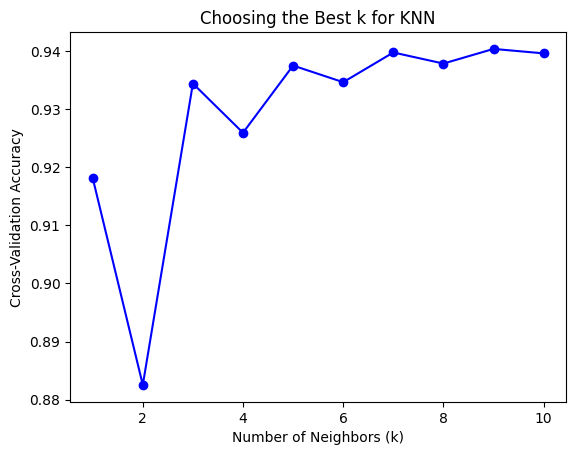

In [9]:
# Set a range of k values to test
k_values = range(1, 11)
cv_scores = []

# Loop through k values and perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores.append(cross_val_score(knn, X1_train, y1_train, cv=5, scoring='accuracy').mean())

# Plot the results
plt.plot(k_values, cv_scores, color='blue', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Choosing the Best k for KNN')
plt.show()


-> we choose k=5

**Model Building**

In [10]:
# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X1_train, y1_train)

KNeighborsClassifier()

**Model Evaluation**

=== KNN Evaluation ===
[[  45  324]
 [  66 6119]]
              precision    recall  f1-score   support

           0       0.41      0.12      0.19       369
           1       0.95      0.99      0.97      6185

    accuracy                           0.94      6554
   macro avg       0.68      0.56      0.58      6554
weighted avg       0.92      0.94      0.93      6554

Accuracy: 0.9404943545926152


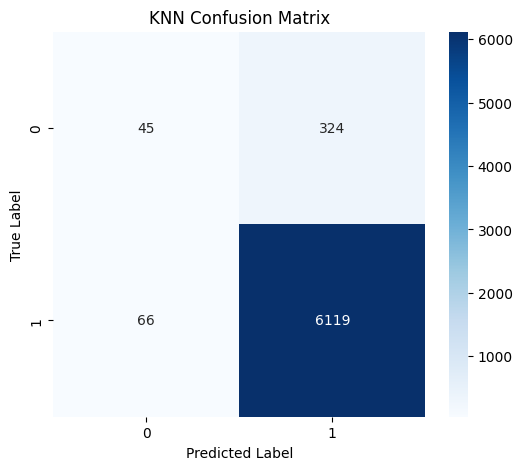

In [11]:
# Evaluate on validation set
y1_pred_val = knn.predict(X1_val)
print("=== KNN Evaluation ===")
print(confusion_matrix(y1_val, y1_pred_val))
print(classification_report(y1_val, y1_pred_val))
print("Accuracy:", accuracy_score(y1_val, y1_pred_val))

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y1_val, y1_pred_val), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [12]:
train_acc = knn.score(X1_train, y1_train)
val_acc = knn.score(X1_val, y1_val)
print(f"Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

Train Accuracy: 0.948121304596605, Validation Accuracy: 0.9404943545926152


**Test Set Predictions**

In [13]:
# Drop the 'id' column and keep only the feature columns
X1_test = test_df.drop(columns=['id'])

# Predict using the trained KNN model
y1_pred_test_knn = knn.predict(X1_test)

# Preview the predictions
print("Predictions on test data:")
print(y1_pred_test_knn)


Predictions on test data:
[1 1 1 ... 1 1 1]


In [14]:

# Count the predicted class distributio
predicted_class_distribution = pd.Series(y1_pred_test_knn).value_counts().sort_index()
print("Class distribution in predictions:")
print(predicted_class_distribution)

Class distribution in predictions:
0      990
1    57931
Name: count, dtype: int64


# 🔷 Classification with Naïve Bayes

**Model Building**

In [15]:
# Initialize the Naive Bayes model
nb = GaussianNB()

# Train the model with the training data
nb.fit(X1_train, y1_train)
# Predict on the validation set
y1_pred_nb = nb.predict(X1_val)


**Model Evaluation**

=== Naïve Bayes Evaluation ===
Confusion Matrix:
 [[  19  350]
 [ 217 5968]]

Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.05      0.06       369
           1       0.94      0.96      0.95      6185

    accuracy                           0.91      6554
   macro avg       0.51      0.51      0.51      6554
weighted avg       0.90      0.91      0.90      6554

Accuracy:  0.9134879462923405


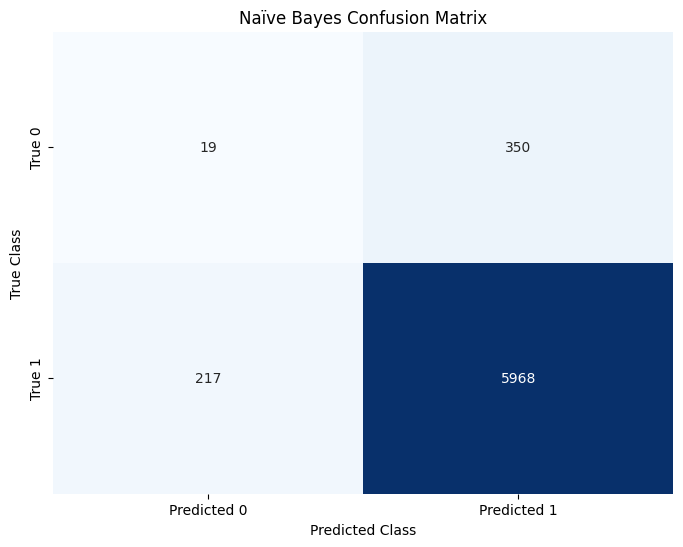

In [16]:
# Evaluate the performance
print("=== Naïve Bayes Evaluation ===")
print("Confusion Matrix:\n", confusion_matrix(y1_val, y1_pred_nb))
print("\nClassification Report:\n", classification_report(y1_val, y1_pred_nb))
print("Accuracy: ", accuracy_score(y1_val, y1_pred_nb))
# Confusion Matrix
cm_nb = confusion_matrix(y1_val, y1_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Naïve Bayes Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


**Test Set Predictions**

In [17]:
# Drop the 'id' column and keep only the feature columns for the test set
X1_test = test_df.drop(columns=['id'])

# Predict using the trained Naive Bayes model
y1_pred_test_nb = nb.predict(X1_test)

# Preview the predictions (optional)
print("Predictions on test data:")
print(y1_pred_test_nb)


Predictions on test data:
[1 1 1 ... 1 1 1]


In [18]:
# Checking the distribution of predicted classes
predictions_df = pd.DataFrame(y1_pred_test_nb, columns=['Predicted'])
class_distribution = predictions_df['Predicted'].value_counts()
print("Class distribution in predictions:")
print(class_distribution)


Class distribution in predictions:
Predicted
1    56868
0     2053
Name: count, dtype: int64


# ***✅ Part 4: Comparative Analysis***

In [24]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_val_knn = knn.predict(X1_val)
y_pred_val_nb = nb.predict(X1_val)

# Accuracy scores
acc_knn = accuracy_score(y1_val, y_pred_val_knn)
acc_nb = accuracy_score(y1_val, y_pred_val_nb)

print(f"KNN Accuracy: {acc_knn:.4f}")
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")


KNN Accuracy: 0.9405
Naive Bayes Accuracy: 0.9135


In [25]:
from sklearn.metrics import classification_report

print("=== KNN Classification Report ===")
print(classification_report(y1_val, y_pred_val_knn))

print("=== Naive Bayes Classification Report ===")
print(classification_report(y1_val, y_pred_val_nb))


=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       0.41      0.12      0.19       369
           1       0.95      0.99      0.97      6185

    accuracy                           0.94      6554
   macro avg       0.68      0.56      0.58      6554
weighted avg       0.92      0.94      0.93      6554

=== Naive Bayes Classification Report ===
              precision    recall  f1-score   support

           0       0.08      0.05      0.06       369
           1       0.94      0.96      0.95      6185

    accuracy                           0.91      6554
   macro avg       0.51      0.51      0.51      6554
weighted avg       0.90      0.91      0.90      6554



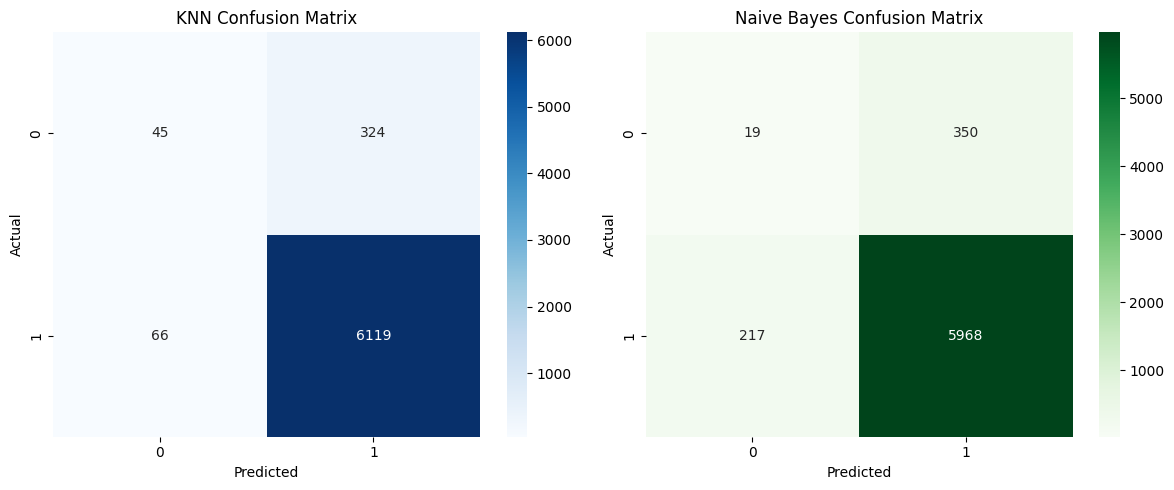

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y1_val, y_pred_val_knn), annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("KNN Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y1_val, y_pred_val_nb), annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("Naive Bayes Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [27]:
roc_knn = roc_auc_score(y1_val, knn.predict_proba(X1_val)[:, 1])
roc_nb = roc_auc_score(y1_val, nb.predict_proba(X_val)[:, 1])

In [28]:
summary_df = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes'],
    'Accuracy': [acc_knn, acc_nb],
    'ROC-AUC': [roc_knn, roc_nb]
})

print(summary_df)


         Model  Accuracy   ROC-AUC
0          KNN  0.940494  0.689772
1  Naive Bayes  0.913488  0.566111


Analysis:
Accuracy: KNN outperforms Naive Bayes in terms of accuracy (94.05% vs. 91.35%).

ROC-AUC: KNN also has a higher ROC-AUC value (0.6898 vs. 0.5661), indicating that KNN has a better ability to discriminate between the positive and negative classes.

**Based on the results, KNN is the better-performing model in both accuracy and ROC-AUC**